# Technical Analysis with Pandas ([pandas_ta](https://github.com/twopirllc/pandas-ta))
* Below contains examples of simple charts that can be made from pandas_ta indicators
* Examples below are for **educational purposes only**

In [31]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
%pylab inline

from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api
e = pd.DataFrame()

Populating the interactive namespace from numpy and matplotlib


c:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### List of Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [17]:
e.ta.indicators()

pandas.ta - Technical Analysis Indicators
Total Indicators: 89
Abbreviations:
    accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, bop, cci, cg, cmf, cmo, coppock, cross, decreasing, dema, donchian, dpo, efi, ema, eom, fisher, fwma, hl2, hlc3, hma, ichimoku, increasing, kama, kc, kst, kurtosis, linear_decay, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvi, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, rvi, short_run, sinwma, skew, slope, sma, stdev, stoch, swma, t3, tema, trend_return, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zlma, zscore


### Individual Indicator help

In [19]:
help(ta.sma)

Help on function ad in module pandas_ta.volume.ad:

ad(high, low, close, volume, open_=None, offset=None, **kwargs)
    Accumulation/Distribution (AD)
    
    Accumulation/Distribution indicator utilizes the relative position
    of the close to it's High-Low range with volume.  Then it is cumulated.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/accumulationdistribution-ad/
    
    Calculation:
        CUM = Cumulative Sum
        if 'open':
            AD = close - open
        else:
            AD = 2 * close - high - low
    
        hl_range = high - low
        AD = AD * volume / hl_range
        AD = CUM(AD)
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        volume (pd.Series): Series of 'volume's
        open (pd.Series): Series of 'open's
        offset (int): How many periods to offset the result.  Default: 0
   

### Load Data from file

In [32]:
df = pd.read_csv('D:\sample.csv', sep=',')

### Initialization

In [74]:
price_size = (16, 8)
ind_size = (16, 2)
ticker = 'Osama'
recent = 126
half_of_recent = int(0.5 * recent)

### Get Ticker and take a peek

In [75]:
last_ = df.shape[0]
recent_startdate = df.tail(recent).index[0]
recent_enddate = df.tail(recent).index[-1]
print(f"{df.shape} from {recent_startdate} to {recent_enddate}\n{df.describe()}")
df.head()

(100, 29) from 0 to 99
       Unnamed: 0        open        high         low       close  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    49.500000  281.622100  282.863951  280.102350  281.468400   
std     29.011492    7.690999    7.141552    8.336814    7.852705   
min      0.000000  263.180000  264.823400  259.850000  263.250000   
25%     24.750000  276.942500  277.835000  274.382500  275.817500   
50%     49.500000  282.085000  283.118850  280.380000  281.695000   
75%     74.250000  288.910000  289.572500  287.165000  288.377500   
max     99.000000  293.090000  293.940000  291.810000  293.580000   

             volume     -4     -3     -2     -1  ...  CUMLOGRET_1  \
count  1.000000e+02  100.0  100.0  100.0  100.0  ...    99.000000   
mean   8.279490e+07   -4.0   -3.0   -2.0   -1.0  ...     0.030057   
std    4.249197e+07    0.0    0.0    0.0    0.0  ...     0.028097   
min    3.571698e+07   -4.0   -3.0   -2.0   -1.0  ...    -0.036770   
25%    5.3

,Unnamed: 0,date,open,high,low,close,volume,-4,-3,-2,...,CUMLOGRET_1,MACD_8_21_9,MACDH_8_21_9,MACDS_8_21_9,Z_30,SMA_10,SMA_20,SMA_50,EMA_10,EMA_20
0,0,2018-07-05,272.17,273.18,270.960,273.11,56925919.0,-4,-3,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-07-06,273.14,275.84,272.715,275.42,66493696.0,-4,-3,-2,...,0.008423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018-07-09,276.55,277.96,276.500,277.90,50550399.0,-4,-3,-2,...,0.017387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-07-10,278.41,279.01,278.080,278.90,51966829.0,-4,-3,-2,...,0.020979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-07-11,277.15,278.04,276.520,276.86,77054739.0,-4,-3,-2,...,0.013637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aliases

In [76]:
opendf = df['open']
closedf = df['close']
volumedf = df['volume']

## Create some constants for some indicators

In [77]:
help(df.ta.constants) # for more info
df.ta.constants(True, -4, 4)
df.tail()

Help on method constants in module pandas_ta.core:

constants(apply, lower_bound=-100, upper_bound=100, every=1) method of pandas_ta.core.AnalysisIndicators instance
    Constants
    
    Useful for indicator levels or if you need some constant value.
    
    Add constant '1' to the DataFrame
    >>> df.ta.constants(True, 1, 1, 1)
    Remove constant '1' to the DataFrame
    >>> df.ta.constants(False, 1, 1, 1)
    
    Adding constants that range of constants from -4 to 4 inclusive
    >>> df.ta.constants(True, -4, 4, 1)
    Removing constants that range of constants from -4 to 4 inclusive
    >>> df.ta.constants(False, -4, 4, 1)
    
    Args:
        apply (bool): Default: None.  If True, appends the range of constants to the
            working DataFrame.  If False, it removes the constant range from the working
            DataFrame.
        lower_bound (int): Default: -100.  Lowest integer for the constant range.
        upper_bound (int): Default: 100.  Largest integer for the 

,Unnamed: 0,date,open,high,low,close,volume,-4,-3,-2,...,CUMLOGRET_1,MACD_8_21_9,MACDH_8_21_9,MACDS_8_21_9,Z_30,SMA_10,SMA_20,SMA_50,EMA_10,EMA_20
95,95,2018-11-16,271.79,274.7500,271.21,273.73,126668040.0,-4,-3,-2,...,0.002268,-1.061307,0.355322,-1.416629,-0.140990,274.936,272.3185,280.9252,273.606245,274.457406
96,96,2018-11-19,273.05,273.3800,268.07,269.10,103061706.0,-4,-3,-2,...,-0.014792,-1.546470,-0.103873,-1.442598,-0.929345,274.507,272.0230,280.5452,272.786927,273.947177
97,97,2018-11-20,265.36,267.0000,263.15,264.12,136021311.0,-4,-3,-2,...,-0.033471,-2.512213,-0.855692,-1.656521,-1.872773,273.407,271.5485,280.0466,271.211122,273.011256
98,98,2018-11-21,265.86,267.1500,265.01,265.02,75563743.0,-4,-3,-2,...,-0.030069,-3.026128,-1.095686,-1.930442,-1.555727,271.808,271.5335,279.5646,270.085464,272.250184
99,99,2018-11-23,263.18,264.8234,263.07,263.25,42807878.0,-4,-3,-2,...,-0.036770,-3.560792,-1.304280,-2.256512,-1.750570,270.083,271.1920,279.0130,268.842652,271.393023


## Price & Volume Charts with Moving Averages

In [78]:
def cscheme(colors):
    aliases = {
        'BkBu': ['black', 'blue'],
        'gr': ['green', 'red'],
        'grays': ['silver', 'gray'],
        'mas': ['black', 'green', 'orange', 'red'],
    }
    aliases['default'] = aliases['gr']
    return aliases[colors]

def machart(kind, fast, medium, slow, append=True, last=last_, figsize=price_size, colors=cscheme('mas')):
    title = ctitle(f"{kind.upper()}s", ticker=ticker, length=last)
    ma1 = df.ta(kind=kind, length=fast, append=append)
    ma2 = df.ta(kind=kind, length=medium, append=append)
    ma3 = df.ta(kind=kind, length=slow, append=append)
    
    madf = pd.concat([closedf, df[[ma1.name, ma2.name, ma3.name]]], axis=1, sort=False).tail(last)
    madf.plot(figsize=figsize, title=title, color=colors, grid=True)    

def volumechart(kind, length=10, last=last_, figsize=ind_size, alpha=0.7, colors=cscheme('gr')):
    title = ctitle("Volume", ticker=ticker, length=last)
    volume = pd.DataFrame({'V+': volumedf[closedf > opendf], 'V-': volumedf[closedf < opendf]}).tail(last)
    
    volume.plot(kind='bar', figsize=figsize, width=0.5, color=colors, alpha=alpha, stacked=True)
    vadf = df.ta(kind=kind, close=volumedf, length=length).tail(last)
    vadf.plot(figsize=figsize, lw=1.4, color='black', title=title, rot=45, grid=True)

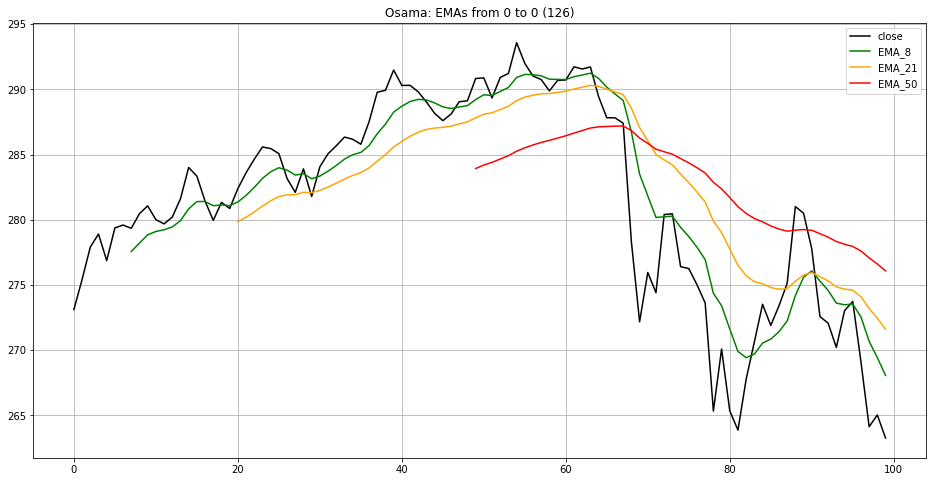

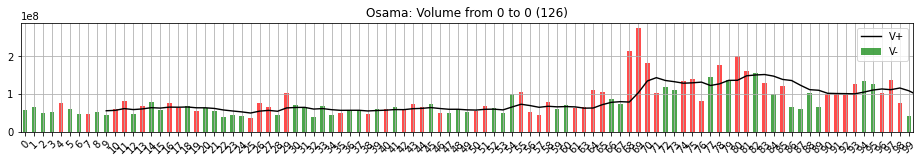

In [79]:
machart('ema', 8, 21, 50, last=recent)
volumechart('ema', last=recent)

## Indicator Examples
* Examples of simple and complex indicators.  Most indicators return a Series, while a few return DataFrames.
* All indicators can be called one of three ways. Either way, they return the result.

### Three ways to use pandas_ta
1. Stand Alone like TA-Lib  ta.**indicator**(*kwargs*).
2. As a DataFrame Extension like df.ta.**indicator**(*kwargs*).  Where df is a DataFrame with columns named 'open', 'high', 'low', 'close, 'volume' for simplicity.
3. Similar to #2, but by calling: df.ta(kind='**indicator**', *kwargs*).

### Cumulative Log Return

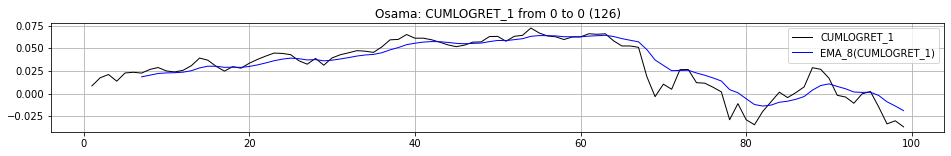

In [80]:
clr_ma_length = 8
clrdf = df.ta.log_return(cumulative=True, append=True)
clrmadf = ta.ema(clrdf, length=clr_ma_length)
qqdf = pd.DataFrame({f"{clrdf.name}": clrdf, f"{clrmadf.name}({clrdf.name})": clrmadf})
qqdf.tail(recent).plot(figsize=ind_size, color=cscheme('BkBu'), linewidth=1, title=ctitle(clrdf.name, ticker=ticker, length=recent), grid=True)

### MACD

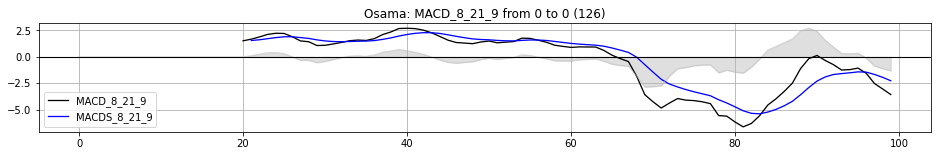

In [81]:
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].tail(recent).plot(figsize=(16, 2), color=cscheme('BkBu'), linewidth=1.3)
macddf[macddf.columns[1]].tail(recent).plot.area(figsize=ind_size, stacked=False, color=['silver'], linewidth=1, title=ctitle(macddf.name, ticker=ticker, length=recent), grid=True).axhline(y=0, color="black", lw=1.1)

### ZScore

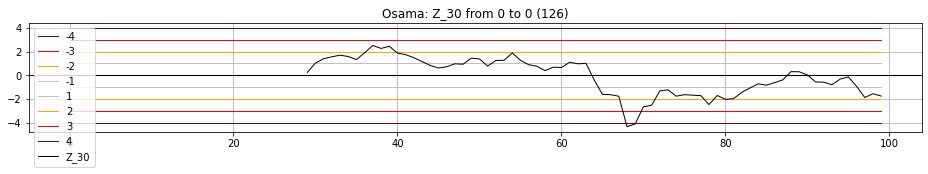

In [82]:
zscoredf = df.ta.zscore(length=30, append=True)
zcolors = ['maroon', 'red', 'orange', 'silver', 'silver', 'orange', 'red', 'maroon', 'black', 'blue']
zcols = df[['-4', '-3', '-2', '-1', '1', '2', '3', '4', zscoredf.name]].tail(recent)
zcols.plot(figsize=ind_size, color=zcolors, linewidth=1, title=ctitle(zscoredf.name, ticker=ticker, length=recent), grid=True).axhline(y=0, color="black", lw=1.1)

# New Features
### Archer Moving Averages Trends
Archer Moving Average Trends (__amat__) returns the long and short run trends of fast and slow moving averages.

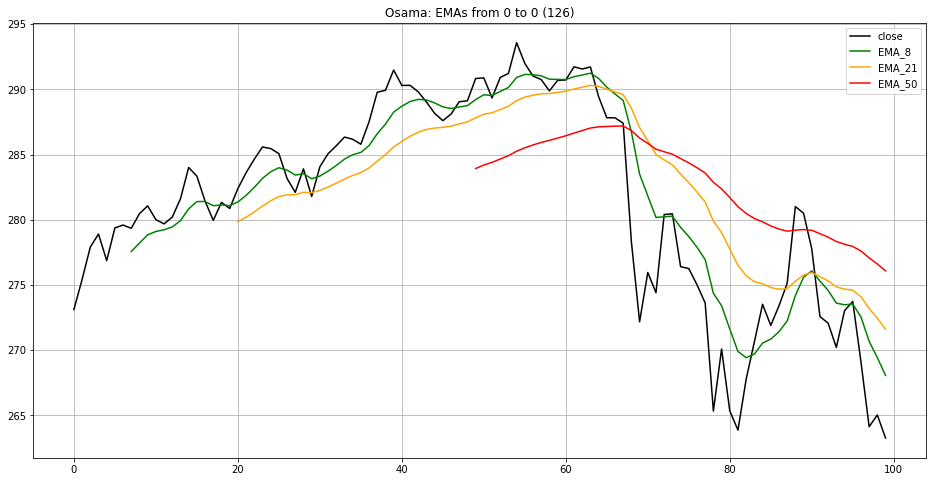

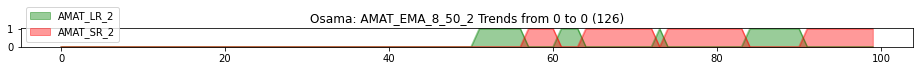

In [83]:
matype = 'ema'
fast_length = 8
medfast_length = 21
slow_length = 50

amat = df.ta.amat(mamode=matype, fast=fast_length, slow=slow_length)
machart(matype, fast_length, medfast_length, slow_length, last=recent) # Price Chart so we can see the association with AMAT
amat.tail(recent).plot(kind='area', figsize=(16, 0.35), color=cscheme('gr'), alpha=0.4, stacked=False, title=ctitle(f"{amat.name} Trends", ticker=ticker, length=recent))

### Archer On Balance Volume
Archer On Balance Volume (__aobv__) returns a DataFrame of OBV, OBV min and max, fast and slow MAs of OBV, and the long and short run trends of the two OBV MAs.

In [84]:
matype = 'sma'
fast_length = 10
medfast_length = 20
slow_length = 50

aobvdf = ta.aobv(close=closedf, volume=volumedf, mamode=matype, fast=fast_length, slow=medfast_length)
aobv_colors = ['black', 'silver', 'silver', 'green', 'red']
aobv_trenddf = aobvdf[aobvdf.columns[-2:]]
aobv_trenddf.name = f"{aobvdf.name} Trends"

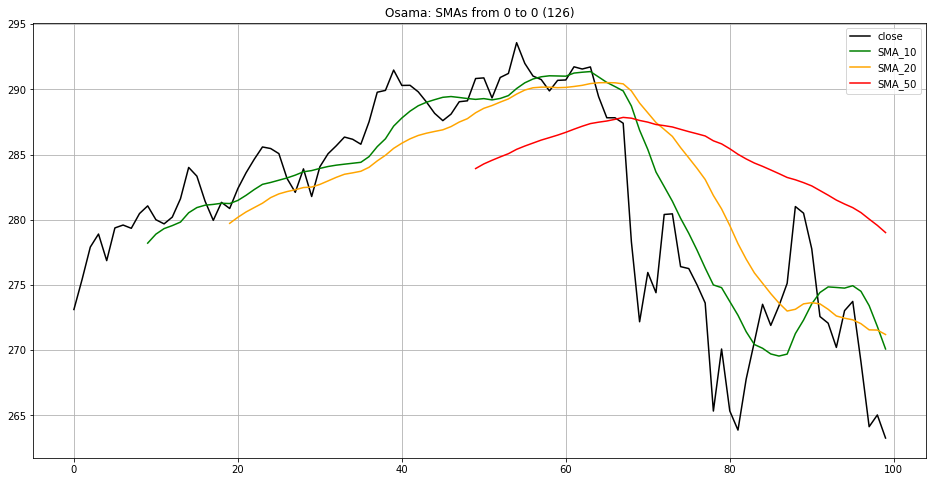

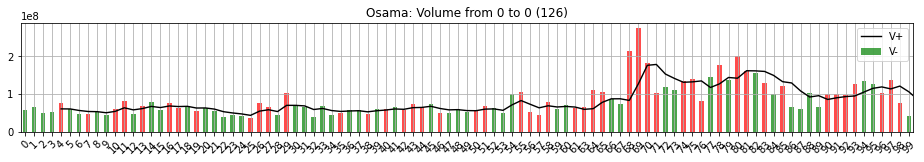

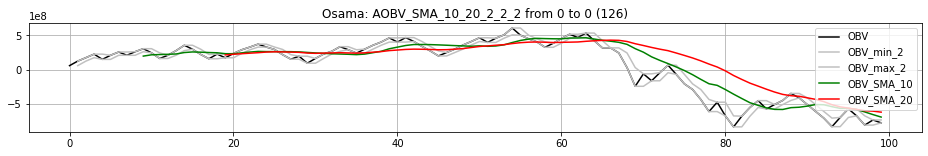

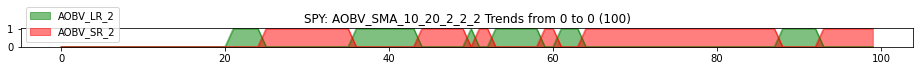

In [85]:
machart(matype, fast_length, medfast_length, slow_length, last=recent) # Price Chart so we can see the association with AOBV
volumechart('ema', length=5, last=recent)
aobvdf[aobvdf.columns[:5]].tail(recent).plot(figsize=ind_size, color=aobv_colors, title=ctitle(aobvdf.name, ticker=ticker, length=recent), grid=True)
aobv_trenddf.tail(recent).plot(kind='area', figsize=(16, 0.35), color=cscheme('gr'), alpha=0.5, title=ctitle(aobv_trenddf.name), stacked=False)

### Long Run and Short Run
Long Run (__long_run__) returns 1 if fast and slow averages approach each other from the below or both are increasing.  Otherwise returns zero.

Conversely, Short Run (__short_run__) returns 1 if fast and slow averages approach each other from above or both are decreasing.  Otherwise returns 0.

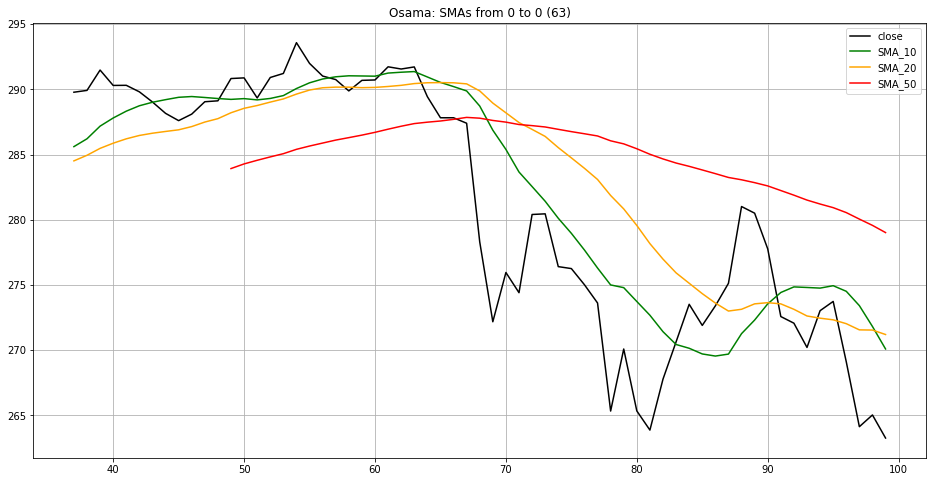

In [86]:
matype = 'sma'
fast_length = 10
medfast_length = 20
slow_length = 50

machart(matype, fast_length, medfast_length, slow_length, last=half_of_recent)

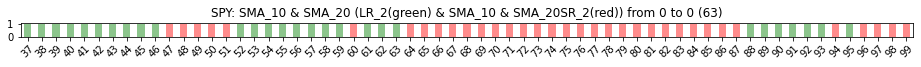

In [87]:
maf = df.ta(kind=matype, length=fast_length)
mam = df.ta(kind=matype, length=medfast_length)
lrun = df.ta.long_run(maf, mam, append=False)  # Long Run of Fast MA and Slow MA
srun = df.ta.short_run(maf, mam, append=False) # Short Run of Fast MA and Slow MA
                   
srun.tail(half_of_recent).plot(kind='bar', figsize=(16,0.25), color=['red'], linewidth=1, alpha=0.45, rot=45)
lrun.tail(half_of_recent).plot(kind='bar', figsize=(16,0.25), color=['green'], linewidth=1, alpha=0.45, title=ctitle(f"{maf.name} & {mam.name} ({lrun.name}(green) & {maf.name} & {mam.name}{srun.name}(red))", length=half_of_recent), rot=45)

### Cross
Cross (__cross__) returns 1 if two series cross and 0 if they do not.  By default, above=True.

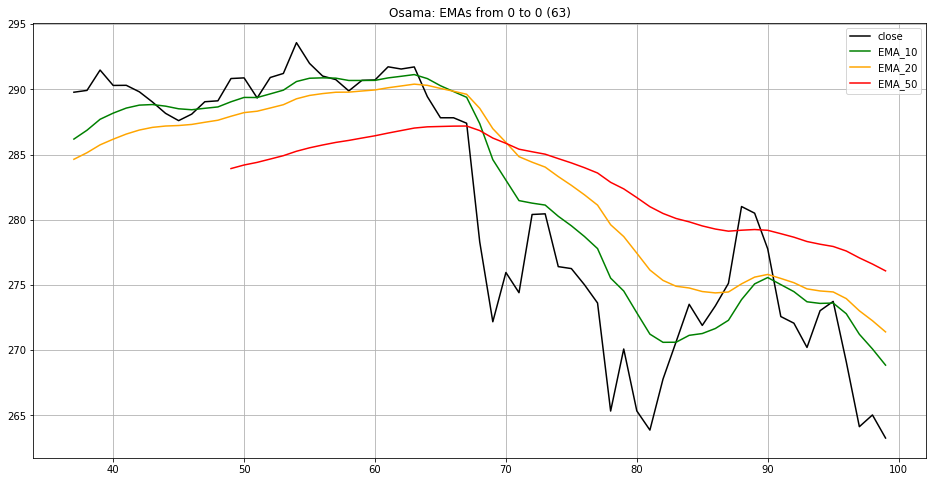

In [94]:
machart(matype, fast_length, medfast_length, slow_length, last=half_of_recent)

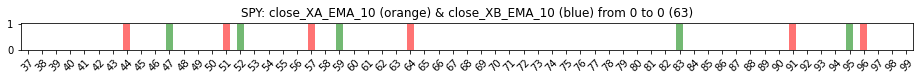

In [95]:
maf = df.ta(kind=matype, length=fast_length)
cross_above = ta.cross(closedf, maf, above=True)
cross_above.tail(int(0.5 * recent)).plot(kind='bar', figsize=(16, 0.5), color=['green'], linewidth=1, alpha=0.55, stacked=False, rot=45)

cross_below = ta.cross(closedf, maf, above=False)
cross_below.tail(int(0.5 * recent)).plot(kind='bar', figsize=(16, 0.5), color=['red'], linewidth=1, alpha=0.55, stacked=False, title=ctitle(f"{cross_above.name} (orange) & {cross_below.name} (blue)", length=int(0.5 * recent)), rot=45)

In [96]:
def recent_crosses(series, **kwargs):
    last = kwargs.pop('last', 5)
    return list(series[series > 0].tail(last).index[::-1])

last_n_crosses = 5
recent_crosses_above = recent_crosses(cross_above, last=last_n_crosses)
recent_crosses_below = recent_crosses(cross_below, last=last_n_crosses)

print(f"Most recent {cross_above.name} Dates:\n    {', '.join(recent_crosses_above)}")
print(f"Most recent {cross_below.name} Dates:\n    {', '.join(recent_crosses_below)}")

TypeError: sequence item 0: expected str instance, int found

### Trend Return
* Trend Return (__trend_return__) calculates the cumulative log returns from a specified trend.
* There is no limit on how to construct a trend.  It can be as simple as: close > SMA(close, 50).

In [97]:
def simple_ma_strategies(kind, fast, slow, cumulative=True, last=last_, figsize=(16, 2), colors=cscheme('default'), alpha=0.35):
    """A very basic long/short cumulative log return model proof of concept (NOT A STRATEGY RECOMMENDATION)"""
    title = ctitle(f"{'Cumulative ' if cumulative else ''}Trend Returns of {kind.upper()}s")
    last = last if last is not None else df.shape[0]
    closedf = df['close']
    maf = df.ta(kind=kind, length=fast)
    mas = df.ta(kind=kind, length=slow)
    
    def ma_return_name(name):
        return f"{name} {' Cumulative' if cumulative else ''} Trend Return"
    
    # Trade Logic
    long = (closedf > maf) & (maf > mas)
    short = ~long
    cum_long_return = ta.trend_return(closedf, long, cumulative=cumulative)
    cum_short_return = ta.trend_return(closedf, short, cumulative=cumulative)
    
    tdf = pd.DataFrame({
        ma_return_name(f"long: {maf.name} > {mas.name}"): cum_long_return,
        ma_return_name(f"short: {maf.name} < {mas.name}"): cum_short_return,
    })
    tdf.set_index(closedf.index, inplace=True)
    window = tdf.tail(last)
    window.plot(kind='area', figsize=figsize, color=colors, linewidth=1, alpha=alpha, title=title, stacked=False, grid=True).axhline(y=0, color="black", lw=1.1)

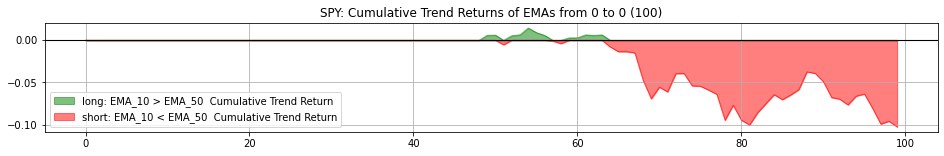

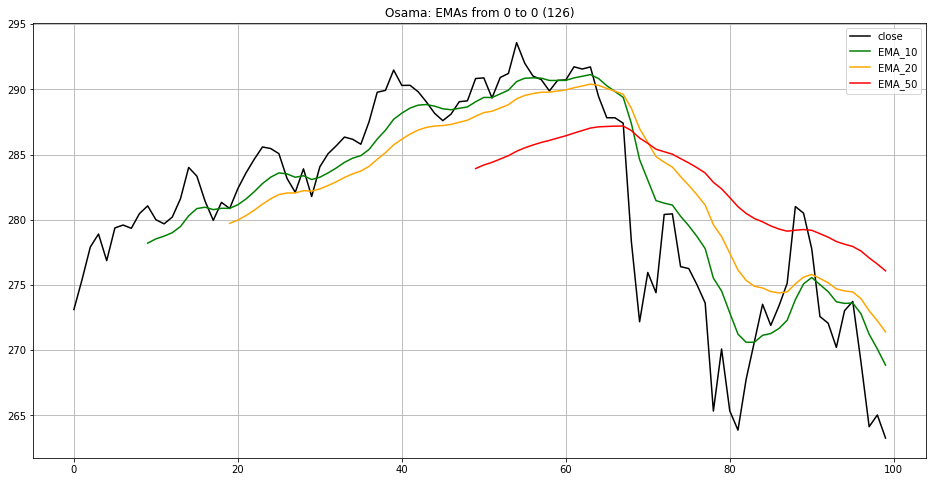

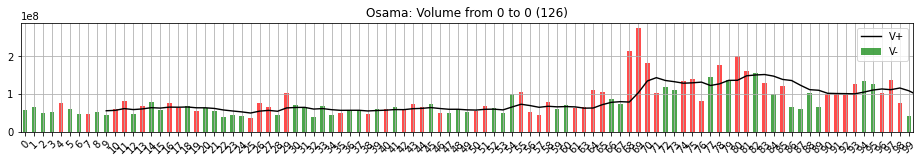

In [98]:
matype = 'ema'
fast_length = 10
medfast_length = 20
slow_length = 50

simple_ma_strategies(matype, fast=fast_length, slow=slow_length, last=recent, colors=cscheme('gr'), alpha=0.5)
machart(matype, fast_length, medfast_length, slow_length, last=recent)
volumechart(matype, last=recent)

# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading strategy, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.